<a href="https://colab.research.google.com/github/leahnagy/yoga_pose_classifier/blob/main/code/baseline_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import os
import itertools

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline 

# modeling imports 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Yoga Pose Classification Dataset

/content/drive/MyDrive/Yoga Pose Classification Dataset


In [4]:
# Load data
X_train = np.load('X_train.npy')
X_test = np.load('X_test1.npy')
Y_train = np.load('Y_train.npy')
Y_test = np.load('Y_test1.npy')

In [5]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1079, 224, 224, 3), (470, 224, 224, 3), (1079,), (470,))

## Split into Train - Validation - Test sets

In [6]:
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, 
                                            test_size=0.2, 
                                            random_state=42)

In [7]:
X_tr.shape, X_val.shape, Y_tr.shape, Y_val.shape

((863, 224, 224, 3), (216, 224, 224, 3), (863,), (216,))

## Baseline Model - Logistic Regression


In [8]:
# Reshape training data, flatten to 2D
nsamples, nx, ny, channels = X_tr.shape 
X_tr_flat = X_tr.reshape(nsamples, nx*ny*channels)

In [9]:
# Reshape validation data, flatten to 2D
msamples, mx, my, mchannels = X_val.shape 
X_val_flat = X_val.reshape(msamples, mx*my*mchannels)

In [10]:
# Check shapes
X_tr_flat.shape, X_val_flat.shape

((863, 150528), (216, 150528))

In [11]:
# Scale data
scaler = StandardScaler()
X_tr_flat = scaler.fit_transform(X_tr_flat)
X_val_flat = scaler.transform(X_val_flat)

## Dimensionality Reduction 
Using PCA, we will reduce the dimensions to 2 principal components to visualize them.

In [12]:
pca = PCA(n_components=2)

X_tr_2PC = pca.fit_transform(X_tr_flat)
X_val_2PC = pca.transform(X_val_flat)

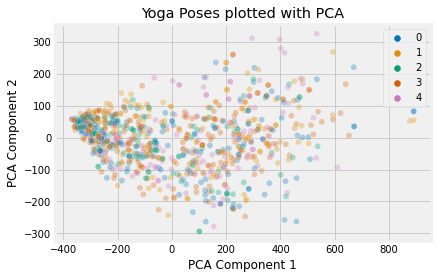

In [13]:
ax = sns.scatterplot(x=X_tr_2PC[:, 0], y=X_tr_2PC[:, 1],
                hue=Y_tr, alpha=.3,
                palette=sns.color_palette("colorblind", 5))

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_title('Yoga Poses plotted with PCA');

In [14]:
logreg = LogisticRegression(multi_class='multinomial',
                            solver ='lbfgs')
logreg.fit(X_tr_2PC, Y_tr)

LogisticRegression(multi_class='multinomial')

In [15]:
# Predict the validation set results and calculate accuracy
y_pred = logreg.predict(X_val_2PC)
print('Accuracy of logistic regression classifier on test set: {:.2f}'
.format(logreg.score(X_val_2PC, Y_val)))

Accuracy of logistic regression classifier on test set: 0.23


## Binomial Logistic Regression Results
**Accuracy** = 0.23<br><br>
Horrible results, but looking at the above visualization, it was expected

### Confusion Matrix

In [17]:
labels = ['warrior2', 'downdog', 'tree', 'plank', 'goddess']
cm = confusion_matrix(Y_val, y_pred)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10  8  0 31  0]
 [10  8  0 29  0]
 [ 8  0  0 25  0]
 [12  6  0 31  0]
 [ 8  9  0 21  0]]


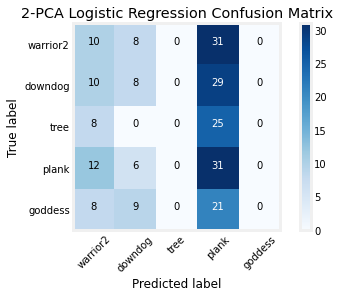

In [29]:
plot_confusion_matrix(cm=cm, classes=labels, title='2-PCA Logistic Regression Confusion Matrix');